## Domain

This is a canonical dataset taken from the UCI Machine Learning Repository. 

It is data collected from the sale of products by a grocery wholesaler in Portugal. The values are in "monetary units".

## Problem

While this task includes labels, it is typically used for clustering or unsupervised learning work. Here we will keep the labels for comparison but will be exploring this dataset in the context of EDA and unsupervised learning in an EDA setting. 

Two columns will work as label for this set `region` and `channel`.

## Solution

We will be working toward a customer segmentation generated by a cluster analysis.

## Data

The following analysis shows:

- there are 440 rows and 8 useful variable columns in the dataset. Two of these columns are target features `Region` and `Channel`. 

- there are six integer value columns:
   - `Fresh`
   - `Milk`
   - `Grocery`
   - `Frozen`
   - `Detergents_Paper`
   - `Delicatessen`


In [1]:
customers <- read.table('Wholesale_customers_data.csv', sep=",", header = T)

In [2]:
head(customers)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [3]:
dim(customers); str(customers)

[1] 440   8

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [4]:
customers$Channel = factor(customers$Channel)
customers$Region = factor(customers$Region)

In [5]:
str(customers)

'data.frame':	440 obs. of  8 variables:
 $ Channel         : Factor w/ 2 levels "1","2": 2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [6]:
cust_sum = summary(customers)
cust_sum

 Channel Region      Fresh             Milk          Grocery     
 1:298   1: 77   Min.   :     3   Min.   :   55   Min.   :    3  
 2:142   2: 47   1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153  
         3:316   Median :  8504   Median : 3627   Median : 4756  
                 Mean   : 12000   Mean   : 5796   Mean   : 7951  
                 3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656  
                 Max.   :112151   Max.   :73498   Max.   :92780  
     Frozen        Detergents_Paper    Delicassen     
 Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [8]:
table(customers$Channel, customers$Region)

   
      1   2   3
  1  59  28 211
  2  18  19 105

In [7]:
customer_features = Filter(is.numeric, customers)

In [9]:
library(repr)
options(repr.plot.width=20, repr.plot.height=6)

In [13]:
sum_vals = data.frame(feature=colnames(customer_features))
sum_vals['mean_'] = sapply(customer_features, mean)
sum_vals['median_'] = sapply(customer_features, median)
sum_vals['sd_'] = sapply(customer_features, sd)
sum_vals

feature,mean_,median_,sd_
Fresh,12000.298,8504.0,12647.329
Milk,5796.266,3627.0,7380.377
Grocery,7951.277,4755.5,9503.163
Frozen,3071.932,1526.0,4854.673
Detergents_Paper,2881.493,816.5,4767.854
Delicassen,1524.870,965.5,2820.106


In [14]:
library(reshape2)

In [16]:
melt(sum_vals)

Using feature as id variables


feature,variable,value
Fresh,mean_,12000.298
Milk,mean_,5796.266
Grocery,mean_,7951.277
Frozen,mean_,3071.932
Detergents_Paper,mean_,2881.493
Delicassen,mean_,1524.870
Fresh,median_,8504.000
Milk,median_,3627.000
Grocery,median_,4755.500
Frozen,median_,1526.000


Using feature as id variables


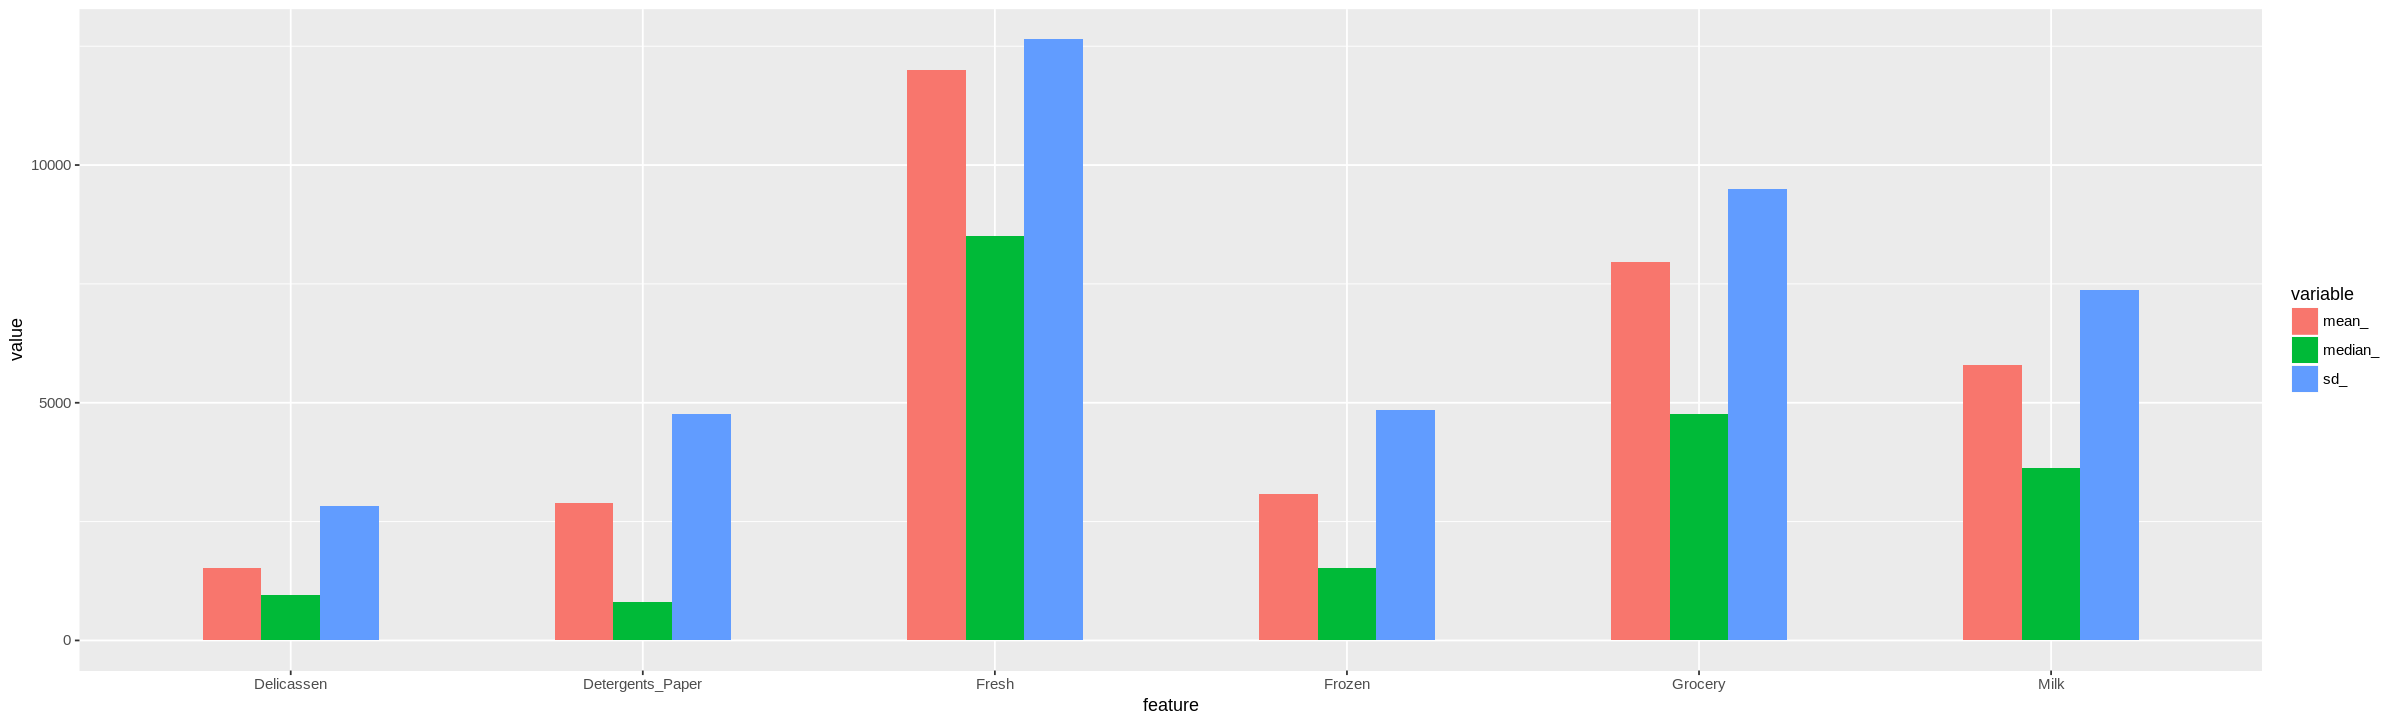

In [15]:
library(ggplot2)

ggplot(melt(sum_vals), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

## Benchmark

As this is an EDA and Unsupervised Learning task, we will not define an explicit benchmark. 

## Metrics

We will not define a metric for this project at this time. 